In [2]:
#importing pandas
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#Creating data frame from the data in the csv file
titanic_df = pd.read_csv('train.csv')

In [5]:
#initial five observations of the data frame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [15]:
#description about the various variables / attributes iin the titanic_df
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [16]:
#importing NumPy, matplotlib and seaborn
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

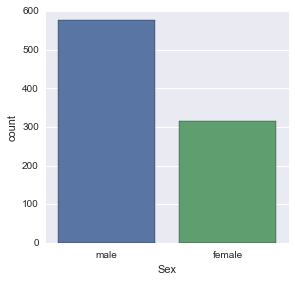

In [31]:
#Distribution of Passengers by Sex
sns.factorplot('Sex',data=titanic_df, kind='count')

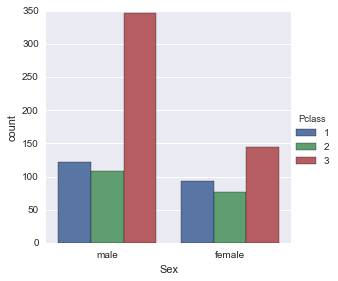

In [37]:
#Distribution of passengers by Sex and Passenger class
sns.factorplot('Sex', data=titanic_df,hue='Pclass',kind='count', hue_order=[1,2,3])

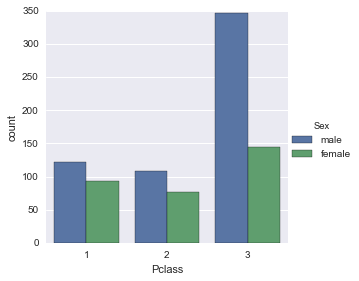

In [38]:
#Distribution of passengers by Passenger class and sex
sns.factorplot('Pclass', data=titanic_df,hue='Sex',kind='count', order=[1,2,3])

In [39]:
#Create function to categorize passengers into one of the following category: male, female and child
def male_female_child(passenger):
    age,sex = passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [40]:
#Adding a new column to titanic data frame for categorzing the passengers as either male, female or child
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [41]:
#Checking titanic data frame for newly added column "person"
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


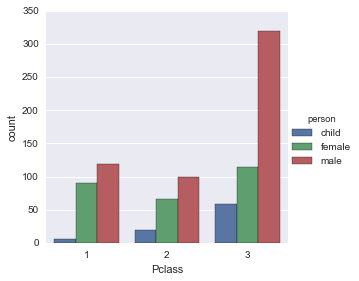

In [46]:
#Distribution of passengers by Passenger class and person column
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count',order=[1,2,3],hue_order=['child','female','male'])

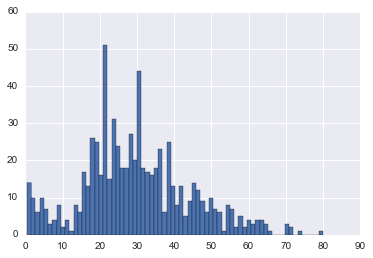

In [47]:
#Histogram od Age variable
titanic_df['Age'].hist(bins=70)

In [48]:
#Mean of the Age variable
titanic_df['Age'].mean()

29.69911764705882

In [49]:
#Count of Paasengers by person variable
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

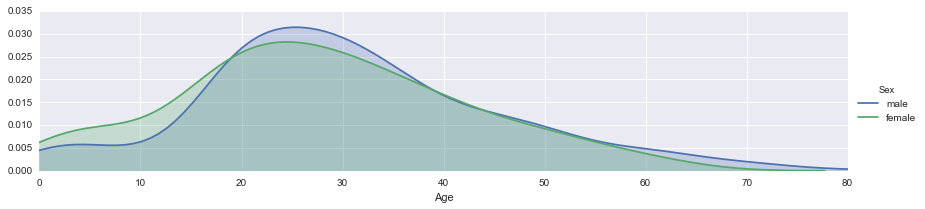

In [52]:
#Visualize the Sex variable using FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

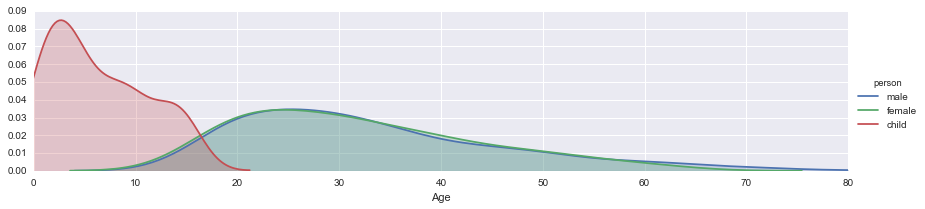

In [54]:
#Visualize the person variable using FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

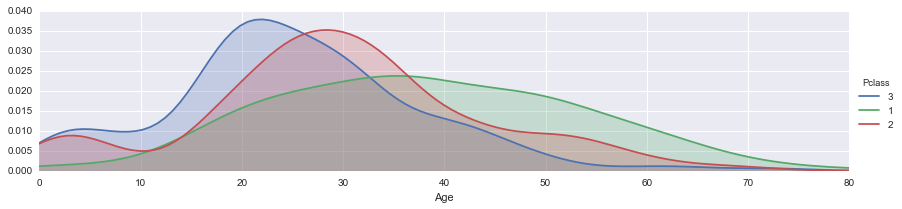

In [56]:
#Visualize the Passenger class variable using FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [58]:
#Creating a deck Series object which contains all Cabins excluding null value
deck = titanic_df['Cabin'].dropna()

In [59]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

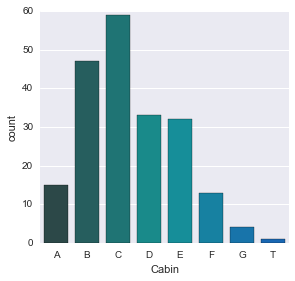

In [64]:
#Created a data frame which stores information about  cabin / deck type of all passengers
# and plotted a factor plot on that cabin variable
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

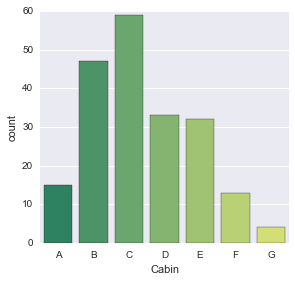

In [67]:
#Omitting Cabin type = 'T' from the cabin data frame as it is not relevant
cabin_df = cabin_df[cabin_df.Cabin!='T']

sns.factorplot('Cabin', data=cabin_df, palette='summer',kind='count',order=['A','B','C','D','E','F','G'])

In [68]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


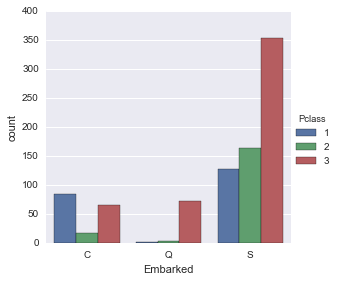

In [72]:
#Created a factor plot of Passengers / observations on Embarked variable categorized by their passenger class
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C','Q','S'], hue_order=[1,2,3])

In [74]:
#
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [75]:
#Adding a new column / variable in the titanic data frame for checking if the passenger as alone or not 
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [76]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [78]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\Mehul\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


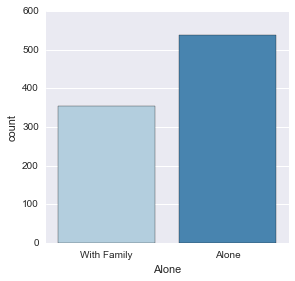

In [80]:
#Distribution of Passengers by Alone column / variable
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')

In [81]:
#Creating a descriptive column for Survived column
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

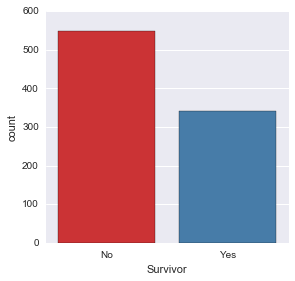

In [84]:
#Catgorization of passengers based on their survival
sns.factorplot('Survivor', data=titanic_df, palette='Set1', kind='count')

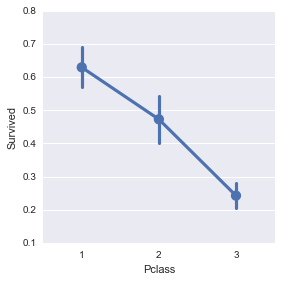

In [86]:
#To visualize percentage of passengers who survived based on their class
sns.factorplot('Pclass','Survived', data=titanic_df, x_order=[1,2,3])

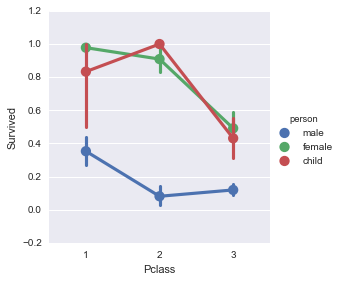

In [88]:
#To visualize percentage of passengers who survived based on their class and gender
sns.factorplot('Pclass','Survived', hue='person',data=titanic_df, x_order=[1,2,3])

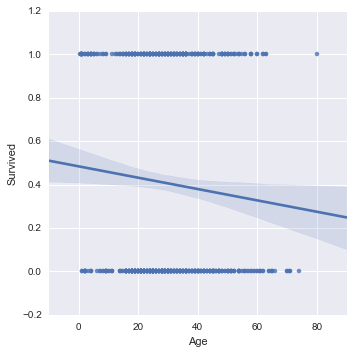

In [89]:
#Passengers age vs Survived = 1.0 / Not Survived = 0.0
sns.lmplot('Age','Survived',data=titanic_df)

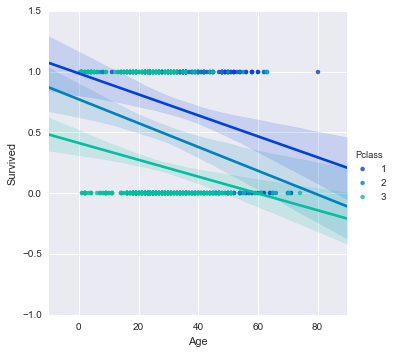

In [91]:
#Passengers age vs Survived = 1.0 / Not Survived = 0.0 for each passenger class
sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='winter', hue_order=[1,2,3])

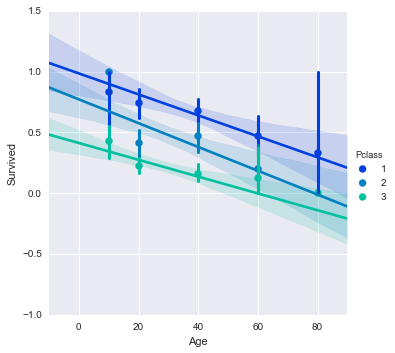

In [92]:
#Passengers age vs Survived = 1.0 / Not Survived = 0.0 for each passenger class by specifying bins for age variable
generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter',x_bins=generations, hue_order=[1,2,3])

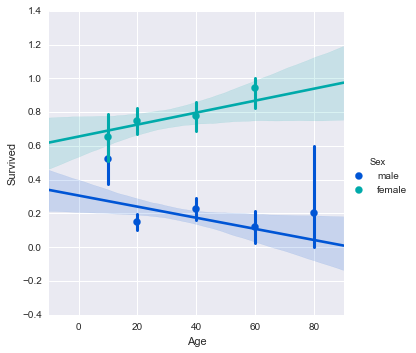

In [94]:
#Passengers age vs Survived = 1.0 / Not Survived = 0.0 for each gender type by specifying bins for age variable
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex', palette='winter',x_bins=generations)